# Data Transformation

데이터를 다양한 방법으로 합치고 변환
- Data merge
- Aggregation
- Pivot table

데이터의 스케일을 변환
- Log

카테고리형 데이터를 숫자형태로 변환
- One Hot Encoding

데이터의 차원축소
- Scaling
- PCA

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 50) # to display all columns
pd.set_option('display.max_rows', 50) # to display all rows

In [4]:
# 데이터 불러오기 
# /Users/kwonkyoungmi/workspaces/workspace_Python/data/salary_1.csv
salary_1 = pd.read_csv('/Users/kwonkyoungmi/workspaces/workspace_Python/data/salary_1.csv')
salary_2 = pd.read_csv('/Users/kwonkyoungmi/workspaces/workspace_Python/data/salary_2.csv')
cpi = pd.read_csv('/Users/kwonkyoungmi/workspaces/workspace_Python/data/cpi.csv')
job = pd.read_csv('/Users/kwonkyoungmi/workspaces/workspace_Python/data/job.csv')

## Data Merge - 데이터 병합
pd.concat(), .merge(), .join() 

`concat`
>목적: 데이터프레임이나 시리즈를 단순히 연결        
>적용 방식: 행(row) 또는 열(column) 기준으로 데이터를 연결, 인덱스를 유지하거나 새로 생성   
>       
>주요 매개변수:     
>>axis: 0이면 행 기준(세로 방향), 1이면 열 기준(가로 방향)으로 연결.     
>>ignore_index: True로 설정하면 기존 인덱스를 무시하고 새 인덱스를 생성.     

```
pd.concat([df1, df2], axis=0) # 행 기준 연결
pd.concat([df1, df2], axis=1) # 열 기준 연결
```


`merge`- 공통 컬럼 기준     
> 목적: 두 데이터프레임을 공통 ~~열~~ 또는 ~~인덱스~~를 기준으로 병합.      
> 적용 방식: SQL의 JOIN과 유사하게 동작하며, inner, outer, left, right 방식 지원.       
>       
> 주요 매개변수:    
>> on: 병합 기준이 되는 열 이름.        
>> how: 병합 방식 ('inner', 'outer', 'left', 'right').      
>> left_on, right_on: 각각 왼쪽과 오른쪽 데이터프레임에서 병합 기준 열을 지정.    

```
pd.merge(df1, df2, on = 'key', how = 'inner') 
df1.merge(df2, on = 'key', how = 'inner')
df1.merge(df2, left_on = 'key', right_on = 'id', how = 'outer') # 병합에 참조할 컬럼의 이름이 다른 경우
```


`join` - 인덱스 기준
>목적: 데이터프레임을 인덱스를 기준으로 병합.       
>적용 방식: 기본적으로 왼쪽 데이터프레임의 ~~인덱스~~를 기준으로 병합. 열 이름이 겹치지 않으면 자동으로 병합, 겹치면 접미사를 추가.     
>       
> 주요 매개변수:
>> how: 병합 방식 ('left', 'right', 'outer', 'inner').
>> on: 병합 기준이 되는 열(기본값은 인덱스).

```
df1.join(df2, how='inner') # 인덱스를 기준으로 병합
df1.join(df2, lsuffix = '_a', rsuffix = '_b') # 컬럼이름이 겹치는 경우, 접미사 추가
```


df.reset_index(drop=True, inplace=True) # 인덱스 초기화     

df.drop(['Reference','Previous','Units','Frequency'], axis = 1, inplace = True) # 필요없는 컬럼 삭제

df.rename(columns={'Last': 'CPI'}, inplace=True) # 컬럼명 변경

In [5]:
'''Salary data 합치기'''
# salary_1과 salary_2를 합친다.

s1 = salary_1.copy()
s2 = salary_2.copy()

# 데이터 확인
print(s1.head());print('--' * 50);print(s2.head())

    Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

   Salary Country      Race  Senior  
0   90000      UK     White       0  
1   65000     USA  Hispanic       0  
2  150000  Canada     White       1  
3   60000     USA  Hispanic       0  
4  200000     USA     Asian       0  
----------------------------------------------------------------------------------------------------
   Age  Gender  Education Level                    Job Title  \
0   29  Female                1  Human Resources Coordinator   
1   23    Male                0              Sales Associate   
2   32  Female        

In [6]:
print(s1.columns);print('--' * 50);print(s2.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')


In [7]:
pd.concat([s1,s2], axis=0)
df_s = pd.concat([s1,s2], axis=0)
# 데이터 확인
df_s.head()
df_s.loc[0] # => 기존 인덱스 그대로 가져옴
# 인덱스 초기화
df_s.reset_index(drop=True, inplace=True)
# 데이터 확인
df_s.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [8]:
'''급여 데이터에 물가지수 반영하기'''

# cpi 데이터 확인
c = cpi.copy()
# 데이터 확인
print(c.head());print('--' * 50);print(c.columns)

          Country Reference    Last Previous                  Units Frequency
0   United States    Sep-23  307.48   306.27  Index 1982-84=100, SA   Monthly
1           China    Sep-23     100    100.1    Index CPPY=100, NSA   Monthly
2         Germany    Sep-23   117.9    117.5  Index 2020=100, CDASA   Monthly
3          France    Sep-23  118.52    118.2     Index 2015=100, SA   Monthly
4  United Kingdom    Sep-23     132    131.3    Index 2015=100, NSA   Monthly
----------------------------------------------------------------------------------------------------
Index(['Country', 'Reference', 'Last', 'Previous', 'Units', 'Frequency'], dtype='object')


In [9]:
print(df_s['Country'].unique())
print(c['Country'].unique())

['UK' 'USA' 'Canada' 'China' 'Australia']
['United States' 'China' 'Germany' 'France' 'United Kingdom' 'Brazil'
 'Italy' 'Russian Federation' 'Canada' 'Australia' 'Spain' 'South Korea'
 'Mexico' 'Indonesia' 'Netherlands']


In [10]:
# cpi 데이터와 salary 데이터의 국가명이 다름
# cpi 데이터의 국가명을 salary 데이터와 맞추기

c['Country'] = c['Country'].replace({'United States': 'USA', 'United Kingdom': 'UK'})

# cpi 데이터와 salary 데이터의 국가명이 같아졌는지 확인
c['Country'].unique()

array(['USA', 'China', 'Germany', 'France', 'UK', 'Brazil', 'Italy',
       'Russian Federation', 'Canada', 'Australia', 'Spain',
       'South Korea', 'Mexico', 'Indonesia', 'Netherlands'], dtype=object)

In [11]:
df_ss = df_s.merge(c, on='Country', how='left')
# 데이터 확인
df_ss.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly


In [12]:
# 필요없는 컬럼 삭제
df_ss.drop(['Reference','Previous','Units','Frequency'], axis = 1, inplace = True)

In [13]:
df_ss.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [14]:
# 컬럼명 변경
df_ss.rename(columns={'Last': 'CPI'}, inplace=True)

In [15]:
df_ss.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


## 결측치 & 이상치 처리

df_ss['CPI'] = pd.to_numeric(df_ss['CPI']) # CPI 데이터 타입 변경

In [16]:
df_ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 522.3+ KB


In [17]:
'''CPI 데이터 타입 변경'''

df_ss['CPI'] = pd.to_numeric(df_ss['CPI'])
# 데이터 확인
df_ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 522.3+ KB


### 결측치

In [18]:
''' 결측치 '''

# 확인
df_ss.isnull().sum()
df_ss.isna().mean()

Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPI                    0.000000
dtype: float64

In [19]:
# 결측치 처리
# 결측치가 있는 행 삭제
df_ss.dropna(inplace=True)
# 데이터 확인
df_ss.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64

In [20]:
# 결측치가 있는 행 삭제 후 데이터 확인
# 데이터 확인
df_ss.info()
df_ss.head()
df_ss.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6680 non-null   object 
 2   Education Level      6680 non-null   int64  
 3   Job Title            6680 non-null   object 
 4   Years of Experience  6680 non-null   float64
 5   Salary               6680 non-null   int64  
 6   Country              6680 non-null   object 
 7   Race                 6680 non-null   object 
 8   Senior               6680 non-null   int64  
 9   CPI                  6680 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 574.1+ KB


,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6680.000000,6680.000000,6680.000000,6680.000000,6680.000000
mean,33.611527,1.622305,8.084656,115308.107635,0.143413,167.119805
std,7.595506,0.880498,6.097948,52807.060078,0.350520,73.225989
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.480000


In [21]:
''' years of experience 데이터 확인 '''

# df_ss.columns
df_ss[df_ss['Years of Experience'] == -1]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
102,49.0,Female,2,HR Manager,-1.0,150000,Australia,White,1,135.3
256,35.0,Male,1,Project Coordinator,-1.0,95000,UK,Asian,1,132.0
359,34.0,Male,1,Operations Coordinator,-1.0,90000,China,Chinese,1,100.0


In [22]:
# -1인 데이터 삭제
df_s1 = df_ss.copy()
df_s1 = df_ss[df_ss['Years of Experience'] != -1]
# 데이터 확인
df_s1['Years of Experience'].describe()

count    6677.000000
mean        8.088737
std         6.096275
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        82.000000
Name: Years of Experience, dtype: float64

In [23]:
df_s1['Years of Experience'].value_counts().sort_index()

Years of Experience
0.0     120
0.5       1
1.0     539
1.5      12
2.0     605
3.0     601
4.0     522
5.0     399
6.0     438
7.0     351
8.0     422
9.0     379
10.0    192
11.0    320
12.0    294
13.0    209
14.0    251
15.0    129
16.0    241
17.0    106
18.0    126
19.0    120
20.0     61
21.0     42
22.0     47
23.0     37
24.0     19
25.0     24
26.0      7
27.0     11
28.0     16
29.0      8
30.0      6
31.0      3
32.0     10
33.0      6
34.0      2
82.0      1
Name: count, dtype: int64

In [24]:
# years of experience 데이터의 이상치 확인
df_s1[df_s1['Age'] - 18 <= df_s1['Years of Experience']]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3
2373,25.0,Male,3,Software Engineer Manager,12.0,169159,China,Chinese,0,100.0
2448,25.0,Male,3,Software Engineer Manager,12.0,169159,China,White,0,100.0


In [25]:
# 이상치 데이터 삭제
df_s1 = df_s1[df_s1['Age'] - 18 > df_s1['Years of Experience']]
# 데이터 확인
df_s1.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


## Aggregation and Group by, Pivot - 집계 및 그룹화, 피봇

df.groupby(['Country','Race'])['Salary'].agg(mean_salary = 'mean', count = 'count').round(2)         

df.groupby(['Country','Race'])['Salary'].agg(['mean','sum','count']).round(2)        

df.reset_index()        # 인덱스 컬럼으로 만들기

pd.pivot_table(data = df_s1 , index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = ['median','mean']).round(2)

pd.melt(t_n, id_vars = 'company', value_vars = ['q1','q2','q3','q4'], var_name ='quarter' ,value_name = 'sales').sort_values('company')     



### .groupby(). , .agg('집계연산','집계연산')

In [26]:
df_s1.groupby('Country').mean(numeric_only=True)

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Country,,,,,,
Australia,33.496246,1.605105,7.940691,114951.573574,0.138889,135.30
Canada,33.690386,1.624527,8.144209,116444.837245,0.152157,158.70
China,33.874251,1.626497,8.243263,116223.106287,0.153443,100.00
UK,33.782707,1.661654,8.237594,115958.893985,0.142105,132.00
USA,33.227306,1.593358,7.821402,112941.930627,0.129151,307.48


In [27]:
df_s1.groupby('Country')['Age'].mean()

Country
Australia    33.496246
Canada       33.690386
China        33.874251
UK           33.782707
USA          33.227306
Name: Age, dtype: float64

In [28]:
df_s1.groupby('Country')['Age'].mean().sort_values()

Country
USA          33.227306
Australia    33.496246
Canada       33.690386
UK           33.782707
China        33.874251
Name: Age, dtype: float64

In [29]:
df_s1.groupby('Country')['Age'].mean().sort_index()

Country
Australia    33.496246
Canada       33.690386
China        33.874251
UK           33.782707
USA          33.227306
Name: Age, dtype: float64

In [30]:
df_s1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior', 'CPI'],
      dtype='object')

In [31]:
df_s1.groupby(['Country','Race'])['Salary'].mean().round(2)

Country    Race            
Australia  Asian               114408.02
           Australian          114236.68
           White               116391.84
Canada     Asian               115159.86
           Black               118415.63
           White               115812.29
China      Chinese             111165.18
           Korean              117099.76
           White               120401.00
UK         Asian               118692.82
           Mixed               116330.86
           Welsh               112560.65
           White               116267.48
USA        African American    112134.07
           Asian               113298.97
           Hispanic            110410.14
           White               115763.79
Name: Salary, dtype: float64

In [32]:
df_s1.groupby(['Country','Race'])['Salary'].agg(mean_salary = 'mean', count = 'count').round(2)

mean_salary  count
Country   Race                                
Australia Asian               114408.02    476
          Australian          114236.68    452
          White               116391.84    404
Canada    Asian               115159.86    455
          Black               118415.63    435
          White               115812.29    431
China     Chinese             111165.18    441
          Korean              117099.76    457
          White               120401.00    438
UK        Asian               118692.82    331
          Mixed               116330.86    334
          Welsh               112560.65    333
          White               116267.48    332
USA       African American    112134.07    351
          Asian               113298.97    335
          Hispanic            110410.14    322
          White               115763.79    347

In [33]:
df_s1.groupby(['Country','Race'])['Salary'].agg(['mean','sum','count']).round(2)

mean       sum  count
Country   Race                                        
Australia Asian             114408.02  54458216    476
          Australian        114236.68  51634978    452
          White             116391.84  47022302    404
Canada    Asian             115159.86  52397736    455
          Black             118415.63  51510798    435
          White             115812.29  49915096    431
China     Chinese           111165.18  49023845    441
          Korean            117099.76  53514589    457
          White             120401.00  52735636    438
UK        Asian             118692.82  39287325    331
          Mixed             116330.86  38854507    334
          Welsh             112560.65  37482695    333
          White             116267.48  38600802    332
USA       African American  112134.07  39359060    351
          Asian             113298.97  37955155    335
          Hispanic          110410.14  35552065    322
          White             115763.79  40170036    347

In [34]:
a = df_s1.groupby(['Country','Race'])['Salary'].agg(['mean','sum','count']).round(2)
a.reset_index()

,Country,Race,mean,sum,count
0,Australia,Asian,114408.02,54458216,476
1,Australia,Australian,114236.68,51634978,452
2,Australia,White,116391.84,47022302,404
3,Canada,Asian,115159.86,52397736,455
4,Canada,Black,118415.63,51510798,435
5,Canada,White,115812.29,49915096,431
6,China,Chinese,111165.18,49023845,441
7,China,Korean,117099.76,53514589,457
8,China,White,120401.00,52735636,438
9,UK,Asian,118692.82,39287325,331


### pd.pivot_table()

`pivot`

> 목적: 데이터를 재구조화하여 행(index), 열(columns), ~~값(values)~~을 지정해 새로운 데이터프레임을 생성.       
>
> 제약 조건:
>>중복된 값이 없어야 함: index와 columns의 조합이 고유해야 합니다. 중복된 값이 있으면 오류가 발생   
>>      
> 사용 예: 단순히 데이터를 재구조화할 때 사용


`pivot_table`

> 목적: 데이터를 재구조화하면서 ~~집계 함수(aggfunc)~~를 적용할 수 있음.        
>       
> 제약 조건:        
>> 중복된 값이 있어도 동작하며, 중복된 값에 대해 집계 함수(aggfunc)를 적용.     
기본 집계 함수는 mean(평균)입니다.      
>>      
> 사용 예: 중복된 값이 있는 데이터를 처리하거나, 집계 연산이 필요한 경우 사용.


In [35]:
df_s1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior', 'CPI'],
      dtype='object')

In [36]:
pd.pivot_table(data = df_s1 , index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = 'mean').round(2)

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.05,106884.71,111291.21,108495.27,104854.69
Male,120896.76,123973.92,120135.52,122244.05,119683.12


In [37]:
pd.pivot_table(data = df_s1 , index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = ['median','mean']).round(2)

median                                               mean  \
Country Australia    Canada     China        UK       USA  Australia   
Gender                                                                 
Female   110000.0  105000.0  110000.0  105000.0  100000.0  107936.05   
Male     120000.0  130000.0  120000.0  120000.0  120000.0  120896.76   

                                                     
Country     Canada      China         UK        USA  
Gender                                               
Female   106884.71  111291.21  108495.27  104854.69  
Male     123973.92  120135.52  122244.05  119683.12

In [38]:
# pivit

sales_df = pd.DataFrame({'company': ['a','a','a','a','b','b','b','b'],
             'quarter': ['q1','q2','q3','q4','q1','q2','q3','q4'],
             'sales': [111,222,333,444,555,666,777,888]})

sales_df

,company,quarter,sales
0,a,q1,111
1,a,q2,222
2,a,q3,333
3,a,q4,444
4,b,q1,555
5,b,q2,666
6,b,q3,777
7,b,q4,888


In [39]:
pd.pivot(sales_df, index = 'company', columns = 'quarter', values = 'sales')

quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [40]:
t = pd.pivot(sales_df, index = 'company', columns = 'quarter', values = 'sales')
print(t.columns)
t

Index(['q1', 'q2', 'q3', 'q4'], dtype='object', name='quarter')


quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [41]:
# 컬럼 name 변경
print(t.columns)
t.columns = t.columns.rename('')

t


Index(['q1', 'q2', 'q3', 'q4'], dtype='object', name='quarter')


,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [42]:
# 인덱스 컬럼으로 변경
t_n = t.reset_index()
t_n

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [43]:
sales_df

,company,quarter,sales
0,a,q1,111
1,a,q2,222
2,a,q3,333
3,a,q4,444
4,b,q1,555
5,b,q2,666
6,b,q3,777
7,b,q4,888


In [44]:
pd.melt(t_n, id_vars = 'company', value_vars = ['q1','q2','q3','q4'], var_name ='quarter' ,value_name = 'sales').sort_values('company')

,company,quarter,sales
0,a,q1,111
2,a,q2,222
4,a,q3,333
6,a,q4,444
1,b,q1,555
3,b,q2,666
5,b,q3,777
7,b,q4,888


## Log, One hot encoding


[로그_KhanAcademy](https://www.youtube.com/watch?v=Z5myJ8dg_rM)         




In [45]:
# log
print(np.log(55))

# exp
print(np.exp(4.007333185232471))

4.007333185232471
55.000000000000014


### One-Hot encording

In [46]:
pd.get_dummies(df_s1, columns = ['Gender'], drop_first = True)

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,True
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,False
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,True
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,False
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,True
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,False
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,True
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,False
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,True


In [47]:
pd.get_dummies(df_s1, columns = ['Gender','Country','Race','Job Title'], drop_first = True)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Advertising Coordinator,Job Title_Back end Developer,...,Job Title_Sales Operations Manager,Job Title_Sales Representative,Job Title_Scientist,Job Title_Social Media Man,Job Title_Social Media Manager,Job Title_Social Media Specialist,Job Title_Software Architect,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Manager,Job Title_Software Project Manager,Job Title_Strategy Consultant,Job Title_Supply Chain Analyst,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,20.0,200000,0,132.00,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6680,32.0,0,3.0,50000,0,135.30,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6681,30.0,1,4.0,55000,0,100.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6682,46.0,2,14.0,140000,0,100.00,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
print(df_s1[['Gender','Country','Race','Job Title']].nunique())

df_s1['Job Title'].unique()


Gender         2
Country        5
Race          10
Job Title    129
dtype: int64


array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [49]:
df_s1['Job Title'].value_counts().tail(30)

Job Title
Digital Content Producer            1
Customer Success Manager            1
Software Project Manager            1
Supply Chain Analyst                1
Office Manager                      1
Principal Engineer                  1
Sales Operations Manager            1
Web Designer                        1
Director of Sales                   1
Customer Support Specialist         1
Director of Product Management      1
Researcher                          1
IT Project Manager                  1
Quality Assurance Analyst           1
Director of Sales and Marketing     1
Account Executive                   1
Customer Service Rep                1
HR Specialist                       1
Social Media Man                    1
Business Intelligence Analyst       1
Director of Business Development    1
Human Resources Specialist          1
Director of Human Capital           1
Advertising Coordinator             1
Operations Director                 1
Network Engineer                    1
Da

In [50]:
j = job.copy()
# 데이터 확인
j.head()

,Job Title,Jobs
0,Software Engineer,Software
1,Data Analyst,Data Analyst
2,Manager,Manager
3,Sales Associate,Sales
4,Director,Director


In [51]:
'''salary 데이터의 Job Title 변경하기 (원핫인코딩 갯수 줄이기 위해)'''

df_s1.merge(j, left_on = 'Job Title', right_on = 'Job Title', how = 'left')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,Marketing


In [52]:
df_s2 = df_s1.merge(j, left_on = 'Job Title', right_on = 'Job Title', how = 'left')

df_s2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48,Director


In [53]:
# 필요없는 컬럼 삭제
df_s2.drop(['Job Title'], axis = 1, inplace = True)

df_s2.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [54]:
df_s2.Jobs.value_counts().tail(15)

Jobs
Technical Writer            1
Supply Chain Manager        1
Designer                    1
Help Desk Analyst           1
Network Engineer            1
Creative Director           1
IT Manager                  1
Web Designer                1
Office Manager              1
Supply Chain                1
Digital Content Producer    1
PR                          1
Advertising Coordinator     1
Quality Assurance           1
Business Development        1
Name: count, dtype: int64

In [55]:
z = df_s2.Jobs.value_counts()
z = z.reset_index()
z.head()


,Jobs,count
0,Software,2156
1,Marketing,999
2,Data Scientist,572
3,Sales,453
4,HR,420


In [56]:
for j, c in zip(z['Jobs'], z['count']):
    ratio = c / z['count'].sum()
    print(f'{j} ({c}): {ratio:.2%}')

z[z['count'] <= 7]['count'].sum() / z['count'].sum()

Software (2156): 32.46%
Marketing (999): 15.04%
Data Scientist (572): 8.61%
Sales (453): 6.82%
HR (420): 6.32%
Data Analyst (389): 5.86%
Product Manager (325): 4.89%
Project Engineer (316): 4.76%
Financial (200): 3.01%
Research (195): 2.94%
Operations (147): 2.21%
Web Developer (129): 1.94%
Product Designer (80): 1.20%
Receptionist (57): 0.86%
Project Manager (36): 0.54%
Business Analyst (23): 0.35%
Graphic Designer (23): 0.35%
Social Media (18): 0.27%
Customer Service (11): 0.17%
Business Development  (7): 0.11%
UX (6): 0.09%
Accountant (6): 0.09%
Delivery Driver (5): 0.08%
Business Development Manager (5): 0.08%
Account (5): 0.08%
Recruiter (4): 0.06%
Scientist (4): 0.06%
Project Coordinator (4): 0.06%
Data Engineer (4): 0.06%
Engineer (3): 0.05%
Technical Support Specialist (3): 0.05%
IT Consultant (2): 0.03%
CTO (2): 0.03%
Event Coordinator (2): 0.03%
Manager (2): 0.03%
Consultant (2): 0.03%
Training Specialist (2): 0.03%
Engineering (2): 0.03%
Copywriter (2): 0.03%
Administrative 

0.01415023332831552

In [57]:
y = z[z['count'] <= 7 ]['Jobs'].values

df_s2['Jobs'].replace(y, 'Other').value_counts()
df_s2['Jobs'].replace(y, 'Other').count()

6643

In [58]:
df_s3 = df_s2.copy()
# Jobs 컬럼의 값이 y인 것을 'Other'로 변경
df_s3['Jobs'] = df_s3['Jobs'].replace(y, 'Other')

df_s3.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Other
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Other


In [ ]:
df_s4 = pd.get_dummies(df_s3, columns = ['Gender','Country','Race','Jobs'], drop_first = True, dtype = int)
df_s4.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [60]:
df_s4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    6674 non-null   float64
 1   Education Level        6674 non-null   int64  
 2   Years of Experience    6674 non-null   float64
 3   Salary                 6674 non-null   int64  
 4   Senior                 6674 non-null   int64  
 5   CPI                    6674 non-null   float64
 6   Gender_Male            6674 non-null   bool   
 7   Country_Canada         6674 non-null   bool   
 8   Country_China          6674 non-null   bool   
 9   Country_UK             6674 non-null   bool   
 10  Country_USA            6674 non-null   bool   
 11  Race_Asian             6674 non-null   bool   
 12  Race_Australian        6674 non-null   bool   
 13  Race_Black             6674 non-null   bool   
 14  Race_Chinese           6674 non-null   bool   
 15  Race

In [61]:
df_s5 = df_s4.astype(int) # True/False를 1/0으로 변경
df_s5.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,32,1,5,90000,0,132,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,28,2,3,65000,0,307,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45,3,15,150000,1,158,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,36,1,7,60000,0,307,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52,2,20,200000,0,307,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
df_s5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    6674 non-null   int64
 1   Education Level        6674 non-null   int64
 2   Years of Experience    6674 non-null   int64
 3   Salary                 6674 non-null   int64
 4   Senior                 6674 non-null   int64
 5   CPI                    6674 non-null   int64
 6   Gender_Male            6674 non-null   int64
 7   Country_Canada         6674 non-null   int64
 8   Country_China          6674 non-null   int64
 9   Country_UK             6674 non-null   int64
 10  Country_USA            6674 non-null   int64
 11  Race_Asian             6674 non-null   int64
 12  Race_Australian        6674 non-null   int64
 13  Race_Black             6674 non-null   int64
 14  Race_Chinese           6674 non-null   int64
 15  Race_Hispanic          6674 non-null  

## Scaling - 스케일링

1. 스케일러 객체 생성
2. 스케일러객체.fit(데이터)
3. 스케일러객체.transform(데이터)   
(4. 스케일러객체.fit_transform())   

df_ss_dt = pd.DataFrame(ss_dt, columns = df_s5.columns) # 데이터프레임변환

`Standard Scaling`      
>    목적: 데이터를 평균 0, 표준편차 1로 변환     

$$[ z = \frac{x - \mu}{\sigma} ]$$           

$$ x : 원본 데이터 값$$       
$$\mu : 데이터의 평균$$      
$$\sigma : 데이터의 표준편차 $$      
>    특징:      
>>    데이터가 정규분포(가우시안 분포)를 따를 때 효과적.          
>>    이상치(outlier)에 민감합니다.       

        
`Robust Scaling`
>    목적: 데이터를 중앙값(median) 0, IQR(Interquartile Range) 1로 변환
$$[ z = \frac{x - Q2}{Q3 - Q1} ]$$
$$    x : 원본 데이터 값$$
$$    Q2 : 중앙값$$
$$    Q1, Q3 : 1사분위수, 3사분위수$$
>    특징:      
>>    이상치(outlier)에 강건(robust)                
>>    데이터가 정규분포를 따르지 않을 때 적합        


`Min-Max Scaling`
> 목적: 데이터를 최소값 0, 최대값 1로 변환      
$$[ z = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} ]$$
$$ x : 원본 데이터 값$$
$$\text{min}(x) : 데이터의 최소값 $$
$$\text{max}(x) : 데이터의 최대값 $$
>특징:
>>데이터가 특정 범위(예: 0~1)로 제한되어야 할 때 적합.      
>>이상치(outlier)에 민감

In [64]:
# 스케일러 객체 생성

ss = StandardScaler() # StandardScaler
rs = RobustScaler() # RobustScaler
mm = MinMaxScaler() # MinMaxScaler

In [ ]:
# fit() 메서드
'''
목적: 데이터를 학습하여 스케일링에 필요한 통계값(예: 평균, 표준편차, 최소값, 최대값 등)을 계산
동작:
    데이터를 기반으로 스케일링에 필요한 정보를 학습
    예를 들어, StandardScaler는 평균과 표준편차를 계산하고, MinMaxScaler는 최소값과 최대값을 계산합
결과 : 스케일러 객체에 계산된 통계값이 저장
사용 시점 : 학습 데이터에 대해 한 번만 호출
'''
ss.fit(df_s5)
rs.fit(df_s5)
mm.fit(df_s5)

MinMaxScaler()

In [109]:
df_s4.head(3)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [111]:
kk = pd.DataFrame(ss.fit_transform(df_s4), columns = df_s4.columns)
kk.head()

ll = pd.DataFrame(rs.fit_transform(df_s4), columns = df_s4.columns)
ll.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# transform() 메서드
'''
목적 : fit()에서 계산된 통계값을 사용하여 데이터를 변환(스케일링)
동작 :
    데이터를 스케일링하여 변환된 값을 반환
    예를 들어, StandardScaler는 데이터를 평균 0, 표준편차 1로 변환
결과 : 입력 데이터를 스케일링한 결과를 반환
사용 시점 : 학습 데이터와 동일한 스케일링을 테스트 데이터나 새로운 데이터에 적용할 때 사용
''' 
ss.transform(df_s5)
rs.transform(df_s5)
mm.transform(df_s5)

array([[0.26829268, 0.33333333, 0.14705882, ..., 0.        , 1.        ,
        0.        ],
       [0.17073171, 0.66666667, 0.08823529, ..., 0.        , 0.        ,
        0.        ],
       [0.58536585, 1.        , 0.44117647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2195122 , 0.33333333, 0.11764706, ..., 0.        , 0.        ,
        0.        ],
       [0.6097561 , 0.66666667, 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.12195122, 0.        , 0.02941176, ..., 0.        , 0.        ,
        0.        ]])

In [69]:
# fit()과 transform()을 한 번에 수행

ss_dt = ss.fit_transform(df_s5)
rs_dt = rs.fit_transform(df_s5)
mm_dt = mm.fit_transform(df_s5)

In [70]:
# 데이터프레임으로 변환
df_ss_dt = pd.DataFrame(ss_dt, columns = df_s5.columns)
df_rs_dt = pd.DataFrame(rs_dt, columns = df_s5.columns)
df_mm_dt = pd.DataFrame(mm_dt, columns = df_s5.columns)

In [74]:
# 데이터 확인
df_ss_dt.head(3)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510001,-0.478921,-0.408641,-0.477055,0.905822,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.040631,-0.248784,-0.306169,-0.175763,-0.058806,-0.259147,-0.419566,-0.150073,-0.119523,-0.110146,-0.22625,-0.222938,-0.073643,-0.092813,-0.173486,-0.269848,-0.052003,1.447601,-0.140391
1,-0.739133,0.429222,-0.841653,-0.952268,-0.408641,1.917189,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.040631,4.019554,-0.306169,-0.175763,-0.058806,-0.259147,-0.419566,-0.150073,-0.119523,-0.110146,-0.22625,-0.222938,-0.073643,-0.092813,-0.173486,-0.269848,-0.052003,-0.690798,-0.140391
2,1.499536,1.565077,1.148260,0.657112,2.447137,-0.121339,0.905822,2.013016,-0.500281,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.040631,-0.248784,-0.306169,-0.175763,-0.058806,-0.259147,-0.419566,-0.150073,8.366600,-0.110146,-0.22625,-0.222938,-0.073643,-0.092813,-0.173486,-0.269848,-0.052003,-0.690798,-0.140391


In [75]:
df_rs_dt.head(3)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.115385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.615385,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.884615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_mm_dt.head(3)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154589,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.280193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# 데이터 통계량 확인
df_ss_dt.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6674.000000,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,-5.110286e-17,1.022057e-16,1.022057e-16,-1.069966e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,-2.235750e-17,-4.152108e-17,3.460090e-17,3.832715e-17,-6.387858e-18,4.870742e-17,5.323215e-18,-3.327009e-17,3.193929e-17,4.471501e-17,0.000000,0.000000,6.387858e-18,-3.406858e-17,-4.258572e-17,-1.703429e-17,0.000000,-2.555143e-17,1.703429e-17,-3.406858e-17,2.555143e-17,6.813715e-17,3.406858e-17,-1.703429e-17,0.000000,3.406858e-17,3.406858e-17,-3.406858e-17,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339132e+00,-2.176344e+00,-4.086407e-01,-9.148598e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-0.040631,-0.248784,-3.061695e-01,-1.757635e-01,-5.880584e-02,-2.591467e-01,-0.419566,-1.500728e-01,-1.195229e-01,-1.101465e-01,-2.262502e-01,-2.229376e-01,-7.364320e-02,-9.281258e-02,-0.173486,-2.698479e-01,-5.200314e-02,-6.907983e-01,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-8.416532e-01,-8.575989e-01,-4.086407e-01,-4.770551e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-0.040631,-0.248784,-3.061695e-01,-1.757635e-01,-5.880584e-02,-2.591467e-01,-0.419566,-1.500728e-01,-1.195229e-01,-1.101465e-01,-2.262502e-01,-2.229376e-01,-7.364320e-02,-9.281258e-02,-0.173486,-2.698479e-01,-5.200314e-02,-6.907983e-01,-1.403912e-01
50%,-2.123872e-01,-7.066332e-01,-1.783488e-01,-5.574179e-03,-4.086407e-01,-4.360109e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-0.040631,-0.248784,-3.061695e-01,-1.757635e-01,-5.880584e-02,-2.591467e-01,-0.419566,-1.500728e-01,-1.195229e-01,-1.101465e-01,-2.262502e-01,-2.229376e-01,-7.364320e-02,-9.281258e-02,-0.173486,-2.698479e-01,-5.200314e-02,-6.907983e-01,-1.403912e-01
75%,5.777311e-01,4.292218e-01,6.507817e-01,8.464505e-01,-4.086407e-01,-1.213388e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,1.555332e+00,-0.040631,-0.248784,-3.061695e-01,-1.757635

In [78]:
round(3.406858e-17, 2) # 0.00

0.0

In [79]:
df_rs_dt.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119502,0.003271,0.143093,1.225727,-0.450704,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.001648,0.058286,0.085706,0.029967,0.003446,0.062931,0.149685,0.022026,0.014085,0.011987,0.048696,0.047348,0.005394,0.008541,0.029218,0.067875,0.002697,0.323045,0.019329
std,0.759437,0.880460,0.670096,0.586881,0.350193,2.811440,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.040567,0.234301,0.279950,0.170509,0.058608,0.242857,0.356789,0.146778,0.117848,0.108834,0.215249,0.212398,0.073251,0.092027,0.168429,0.251551,0.051867,0.467675,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.346154,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.115385,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.884615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,2.000000,3.000000,1.500000,1.000000,6.615385,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df_mm_dt.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237515,0.460422,0.143093,0.323038,0.549296,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.001648,0.058286,0.085706,0.029967,0.003446,0.062931,0.149685,0.022026,0.014085,0.011987,0.048696,0.047348,0.005394,0.008541,0.029218,0.067875,0.002697,0.323045,0.019329
std,0.185229,0.293487,0.177378,0.211574,0.350193,0.353128,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.040567,0.234301,0.279950,0.170509,0.058608,0.242857,0.356789,0.146778,0.117848,0.108834,0.215249,0.212398,0.073251,0.092027,0.168429,0.251551,0.051867,0.467675,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.169082,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.280193,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## PCA - 주성분분석

다중공선성 (MultiCollinearity)
> 회귀분석에서 사용된 모형의 일부 예측 변수가 ~~다른 예측 변수와 상관 정도가 높아~~, 데이터 분석 시 부정적인 영향을 미치는 현상     
여러 개의 변수들이 서로 영향을 주고 있다면, 하나의 영향력을 검증 할 때, 다른 하나의 영향력을 완벽히 통제할 수 없음      
>> - 각 변수의 영향력을 분리해서 추정하기 어려워짐 
>> - 작은 데이터의 변화에도 모델의 변수 예측값이 크게 달리질 수 있음
>> -  실제로 유의미한 결과를 도출하기 어려우며, 해석하기도 어려움       

> 다중공선성 문제 해결 방법 : 문제가 있는 변수를 찾아서
>> - 하나만 선택
>> - 두 변수를 결합하여 새로운 변수 생성 (차원축소기술)

### 상관계수를 시각화 하여 다중공선성 문제 여부 확인

In [ ]:
# 시각화 1
df_s5.corr().round(1).style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Customer Service,Jobs_Data Analyst,Jobs_Data Scientist,Jobs_Financial,Jobs_Graphic Designer,Jobs_HR,Jobs_Marketing,Jobs_Operations,Jobs_Other,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Receptionist,Jobs_Research,Jobs_Sales,Jobs_Social Media,Jobs_Software,Jobs_Web Developer
Age,1.000000,0.600000,0.900000,0.700000,0.300000,-0.000000,0.100000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.200000,0.100000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,-0.000000,0.300000,0.000000,-0.100000,0.000000,-0.200000,-0.000000,0.000000,-0.100000
Education Level,0.600000,1.000000,0.600000,0.600000,0.300000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.100000,0.400000,-0.000000,-0.000000,0.000000,0.000000,-0.100000,-0.000000,-0.100000,-0.000000,0.200000,-0.000000,-0.200000,0.300000,-0.300000,-0.000000,-0.000000,-0.100000
Years of Experience,0.900000,0.600000,1.000000,0.800000,0.300000,-0.000000,0.100000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.100000,0.200000,0.000000,-0.100000,-0.000000,0.000000,0.000000,0.000000,-0.100000,-0.000000,0.200000,0.000000,-0.100000,0.100000,-0.200000,-0.000000,0.000000,-0.100000
Salary,0.700000,0.600000,0.800000,1.000000,0.200000,-0.000000,0.100000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.100000,0.000000,0.300000,0.000000,-0.100000,-0.100000,-0.100000,-0.000000,-0.100000,-0.100000,0.100000,0.200000,-0.000000,-0.200000,0.100000,-0.300000,-0.100000,0.000000,-0.100000
Senior,0.300000,0.300000,0.300000,0.200000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.100000,-0.000000,-0.000000,-0.000000,0.100000,-0.100000,-0.000000,0.100000,-0.000000,-0.100000,0.500000,0.000000,-0.000000,0.100000,-0.100000,-0.000000,-0.100000,-0.100000
CPI,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.100000,-0.500000,-0.200000,1.000000,0.100000,-0.100000,-0.000000,-0.200000,0.400000,-0.200000,-0.100000,-0.100000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
Gender_Male,0.100000,0.000000,0.100000,0.100000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.100000,0.000000,-0.100000,-0.000000,-0.100000,-0.200000,0.100000,0.000000,0.100000,0.100000,0.100000,0.000000,-0.100000,-0.000000,0.000000,-0.100000,0.100000,0.000000
Country_Canada,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,1.000000,-0.200000,-0.200000,-0.300000,0.100000,-0.100000,0.500000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
Country_China,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,-0.200000,1.000000,-0.200000,-0.300000,-0.300000,-0.100000,-0.100000,0.500000,-0.100000,0.500000,-0.100000,-0.100000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
Country_U

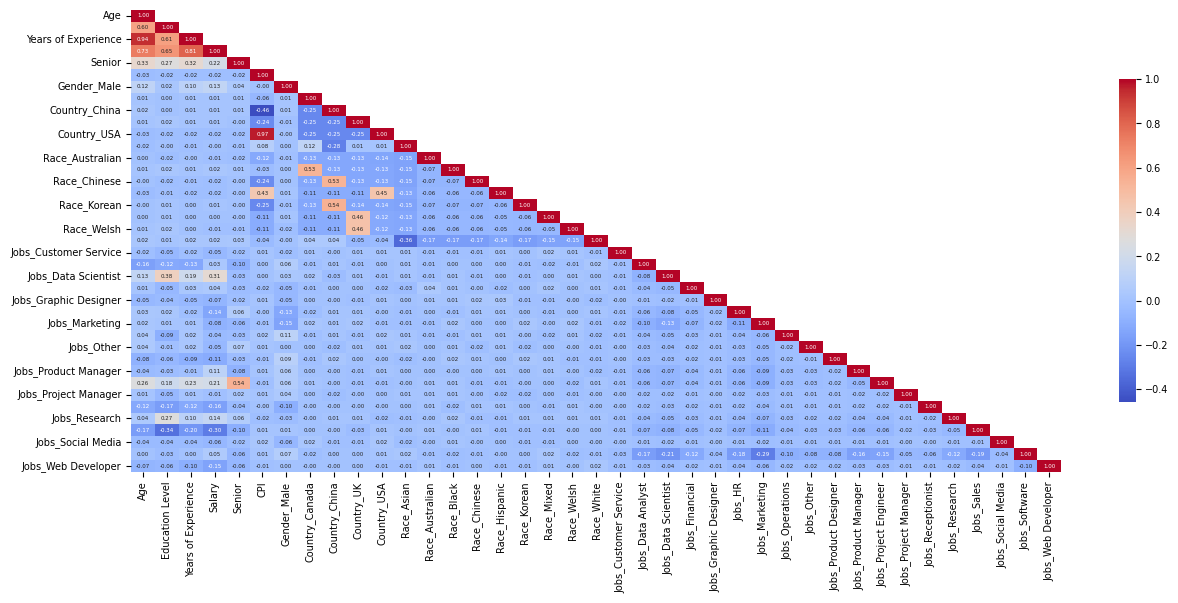

In [98]:
# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = df_s5.corr().round(2) # round(2) => 소수점 2자리까지 표시

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기

plt.figure(figsize=(15, 6))

ax = sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot=True, fmt='.2f', cbar_kws={"shrink": .7}, annot_kws={"size": 4})

plt.xticks(fontsize=7)  # x축 글자 크기
plt.yticks(fontsize=7)  # y축 글자 크기

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)

plt.show()

### PCA 적용

In [99]:
# PCA 객체 생성
pca = PCA(n_components = None) # n_components: 주성분의 개수, none => 모든 주성분을 사용
# PCA 수행
pca.fit(df_s5)

PCA()

### 차원축소 할 PCA 컴포넌트 수 결정

In [ ]:
''' 1. 그래프로 확인 해서 결정하기'''

# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
explained_variance_ratio = pca.explained_variance_ratio_ 

# Explained Variance의 누적합 계산  
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

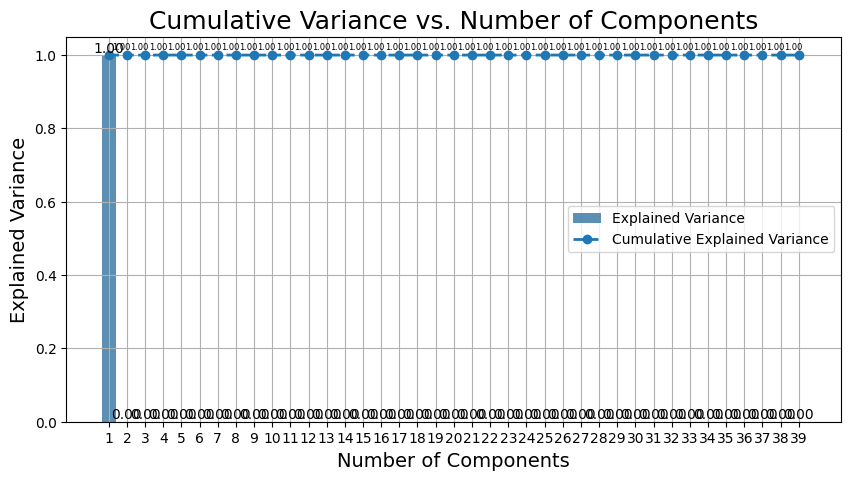

In [113]:
# 그래프 그리기
plt.figure(figsize=(10, 5)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3 # x축 위치 조정
y_offset = 0.01 # y축 위치 조정

# 각 성분의 설명된 분포에 대한 막대 그래프에 값 표시
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=6)

''' 
zip(): 두 개 이상의 iterable 객체를 묶어주는 함수
enumerate(): iterable 객체를 인덱스와 함께 반환하는 함수
i: 인덱스
ev_ratio: 설명된 분포(각 주성분이 데이터의 분산을 얼마나 설명하는지)
cum_ev_ratio: 누적 분포 (누적된 분산 설명 비율)
'''

plt.grid(axis='both')   
plt.show()

In [128]:
'''옵션 2. 간략하게 계산해서 확인하여 결정하기'''

# PCA 객체 생성
pca = PCA(n_components = None) # n_components: 주성분의 개수, none => 모든 주성분을 사용
# PCA 수행
pca.fit(df_s5)

# explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
explained = pca.explained_variance_ratio_ 
explained
 
# Explained Variance 비율을 계산해 주는 함수 
for i, j in enumerate(explained):
    c = explained.sum()
    if c > 0.95:
        print(f'PC {i+1} -  explained_variance: {j:.4f} , cumulative_explained_variance : {c:.4f}')
        break
    else:
        print(f'PC {i+1} -  explained_variance: {j:.4f} , cumulative_explained_variance : {c:.4f}')
    

PC 1 -  explained_variance: 1.0000 , cumulative_explained_variance : 1.0000


### 결정된 컴포넌트 갯수로 transform 하기

In [125]:
# 6개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=1)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(df_s5)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 다시 추가
# data_pca.index = data.index

In [126]:
data_pca.head()

,PC1
0,-25294.401459
1,-50294.407056
2,34705.599453
3,-55294.405807
4,84705.595645


## others

In [ ]:
# 변수 중 Data Type이 object인 변수들 제거하고 저장하기
salary_df.info()
obj = salary_df.select_dtypes('object').columns
salary_df.drop(obj, axis = 1, inplace = True)
salary_df.head()